**ML - Fall 2023 - Practical - 3**<br>
**Practical Homework 3 - Logistic Regression**

### Full Name : Parham Rezaei
### Student Number : 400108547
### Colab Link: https://colab.research.google.com/drive/1BEcdjgjJOaIwaCRP4a0P8n4qCTAChYdV#scrollTo=a1f14f8f
___

# P1: Introduction (10 points)
The dataset consists of several game result predictor (independent) variables and one target (dependent) variable, `win_or_defeat`. <br> Independent variables include the `spell_used`, `position`, `towers_damage`, `kill_death_ratio`, `controlling_time`, and so on.
  * spell_used
  * trap_used
  * character
  * position
  * location
  * assists
  * damage_amount
  * towers_damage
  * rooms_damage
  * deaths
  * money_total
  * kill_death_ratio
  * kills_total
  * level
  * controlling_time
  * total_damage
  * earned_damage
  * special_enemy_killed
  * room_kills
  * main_score
  * win_or_defeat

First, we perform data exploration to get a better understanding of the data. Then, we perform data preprocessing to prepare the data for the regression model. Finally, we train a regression model to predict the outcome.

In [1]:
data_link = "https://drive.google.com/file/d/1SGuWqcRJ1GvPO9RxzxjOAkCEN_RDJY9d/view?usp=sharing"

In [2]:
!pip install typing-extensions --upgrade
!pip install ydata-profiling
!pip install gdown





  Attempting uninstall: typing-extensions

    Found existing installation: typing_extensions 4.5.0

    Uninstalling typing_extensions-4.5.0:

      Successfully uninstalled typing_extensions-4.5.0

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.

tensorflow-probability 0.22.0 requires typing-extensions<4.6.0, but you have typing-extensions 4.9.0 which is incompatible.




     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.6/357.6 kB 4.5 MB/s eta 0:00:00






     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 381.9/381.9 kB 22.4 MB/s eta 0:00:00





     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 13.2 MB/s eta 0:00:00




  Preparing metadata (setup.py) ... done



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 39.4 MB/s eta 0:00:00











     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 30.1 MB/s eta 0:00:00










In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [4]:
!gdown 1SGuWqcRJ1GvPO9RxzxjOAkCEN_RDJY9d

Downloading...

From: https://drive.google.com/uc?id=1SGuWqcRJ1GvPO9RxzxjOAkCEN_RDJY9d

To: /content/train.csv

100% 493k/493k [00:00<00:00, 141MB/s]


Load the dataset as a dataframe. Then, check for any null values and remove the rows containing them. Finally, display the first 10 rows. Also check for duplicate rows and delete them, if there are any. Report some other metrics like `Kurtosis` and `Interquartile range (IQR)` (hint: search and read about ydata-profiling). **(P1-1: 5 points)**

In [51]:
df = pd.read_csv('train.csv')
df.drop(['Unnamed: 0'], axis=1, inplace=True)
print("null counts:")
print(df.isnull().sum().any())
df.dropna(inplace=True)
print(df.head(10))


null counts:

True

    spell_used  trap_used    character   position       location  assists  \

0            4         12  TwistedFate  Side.blue  Lane.top_lane      9.0   

2            4         12        Ziggs  Side.blue  Lane.bot_lane      3.0   

3            4          7        Senna   Side.red  Lane.bot_lane      4.0   

5            4         11       Rengar   Side.red    Lane.jungle      7.0   

6            4         12        Ziggs  Side.blue  Lane.bot_lane      9.0   

7            4         14        Karma  Side.blue   Lane.utility      4.0   

8            3          4         Zyra   Side.red   Lane.utility      8.0   

9            4         12       Graves   Side.red  Lane.mid_lane      5.0   

10          11          4         Olaf  Side.blue    Lane.jungle      3.0   

11          14         12         Kled   Side.red  Lane.top_lane      3.0   



    damage_amount  towers_damage  rooms_damage  deaths  ...  kill_death_ratio  \

0            1862           5119      

In [52]:
print("duplicate counts:")
print(df.duplicated().sum().any())
print(df.duplicated().sum())
df.drop_duplicates(inplace=True)
print(df.head(10))

duplicate counts:

True

123

    spell_used  trap_used    character   position       location  assists  \

0            4         12  TwistedFate  Side.blue  Lane.top_lane      9.0   

2            4         12        Ziggs  Side.blue  Lane.bot_lane      3.0   

3            4          7        Senna   Side.red  Lane.bot_lane      4.0   

5            4         11       Rengar   Side.red    Lane.jungle      7.0   

6            4         12        Ziggs  Side.blue  Lane.bot_lane      9.0   

7            4         14        Karma  Side.blue   Lane.utility      4.0   

8            3          4         Zyra   Side.red   Lane.utility      8.0   

9            4         12       Graves   Side.red  Lane.mid_lane      5.0   

10          11          4         Olaf  Side.blue    Lane.jungle      3.0   

11          14         12         Kled   Side.red  Lane.top_lane      3.0   



    damage_amount  towers_damage  rooms_damage  deaths  ...  kill_death_ratio  \

0            1862           

In [53]:
print(df.kurtosis())

spell_used              -0.757245

trap_used               -1.557886

assists                  1.815509

damage_amount           20.960033

towers_damage            3.020424

rooms_damage            20.960033

deaths                   0.384594

money_total              0.331414

kill_death_ratio         9.897040

kills_total              1.406950

level                   -0.377174

controlling_time        12.187904

total_damage             0.696803

earned_damage            1.846562

special_enemy_killed    -1.154690

room_kills               2.535319

main_score               4.027040

win_or_defeat           -2.000395

dtype: float64


<ipython-input-53-d60d4f9a2ef2>:1: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.

  print(df.kurtosis())


In [54]:
print(df.describe(include=[np.number]).T)

                       count           mean           std     min       25%  \

spell_used            4490.0       6.704009      3.974401     1.0      4.00   

trap_used             4490.0       8.442539      4.316806     1.0      4.00   

assists               4490.0       8.192650      5.649847     0.0      4.00   

damage_amount         4490.0    2646.193764   3200.977021     0.0    417.00   

towers_damage         4490.0    9416.804232  10129.678768     0.0   2091.25   

rooms_damage          4490.0    2646.193764   3200.977021     0.0    417.00   

deaths                4490.0       5.728731      3.018898     0.0      3.00   

money_total           4490.0   10872.185523   3473.578853  3093.0   8332.00   

kill_death_ratio      4490.0       3.618697      3.791881     0.0      1.30   

kills_total           4490.0       5.708018      4.311553     0.0      2.00   

level                 4490.0      13.832071      2.374747     6.0     12.00   

controlling_time      4490.0      18.924

In [55]:
tmpdesc = df.describe(include=[np.number]).T
tmpdesc["IQR"] = tmpdesc["75%"]-tmpdesc["25%"]
tmpdesc["IQR"]

spell_used                  7.00
trap_used                   8.00
assists                     7.00
damage_amount            3335.75
towers_damage           11397.50
rooms_damage             3335.75
deaths                      5.00
money_total              4705.00
kill_death_ratio            3.20
kills_total                 6.00
level                       4.00
controlling_time           17.00
total_damage            92239.25
earned_damage           12628.25
special_enemy_killed      155.00
room_kills                  2.00
main_score                 20.00
Name: IQR, dtype: float64

Calculate the mean, standard deviation, min and max value for each non object column. **(P1-2: 5 points)**

In [56]:
print(df.describe(include=[np.number]).T[['mean', 'std', 'min', 'max']])

                               mean           std     min       max

spell_used                 6.704009      3.974401     1.0      21.0

trap_used                  8.442539      4.316806     1.0      21.0

assists                    8.192650      5.649847     0.0      41.0

damage_amount           2646.193764   3200.977021     0.0   44162.0

towers_damage           9416.804232  10129.678768     0.0   68474.0

rooms_damage            2646.193764   3200.977021     0.0   44162.0

deaths                     5.728731      3.018898     0.0      21.0

money_total            10872.185523   3473.578853  3093.0   28566.0

kill_death_ratio           3.618697      3.791881     0.0      33.0

kills_total                5.708018      4.311553     0.0      30.0

level                     13.832071      2.374747     6.0      18.0

controlling_time          18.924499     14.064164     0.0     193.0

total_damage          117845.452784  70418.291650  5401.0  499423.0

earned_damage          21461.19109

In [57]:
print("mean")
print(df.mean())
print("min")
print(df.min())
print("max")
print(df.max())
print("std")
print(df.std())

mean

spell_used                   6.704009

trap_used                    8.442539

assists                      8.192650

damage_amount             2646.193764

towers_damage             9416.804232

rooms_damage              2646.193764

deaths                       5.728731

money_total              10872.185523

kill_death_ratio             3.618697

kills_total                  5.708018

level                       13.832071

controlling_time            18.924499

total_damage            117845.452784

earned_damage            21461.191091

special_enemy_killed       120.882183

room_kills                   1.034967

main_score                  30.129176

win_or_defeat                0.494432

dtype: float64

min

spell_used                          1

trap_used                           1

character                      Aatrox

position                    Side.blue

location                Lane.bot_lane

assists                           0.0

damage_amount                       0

<ipython-input-57-13e32197e242>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.

  print(df.mean())

<ipython-input-57-13e32197e242>:8: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.

  print(df.std())


# P2: Data Exploration (30 points)
In this section, we perform some data exploration to get a better understanding of the data.

1- Show number of unique value for `location` column **(P2-1: 5 points)**

In [58]:
print(df['location'].unique())
print(df['location'].value_counts())

['Lane.top_lane' 'Lane.bot_lane' 'Lane.jungle' 'Lane.utility'

 'Lane.mid_lane']

Lane.jungle      952

Lane.top_lane    934

Lane.mid_lane    891

Lane.bot_lane    874

Lane.utility     839

Name: location, dtype: int64


2- Plot correlation matrix between features **(P2-2: 5 points)**

<ipython-input-59-854b635fdfec>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

  corr = df.corr()


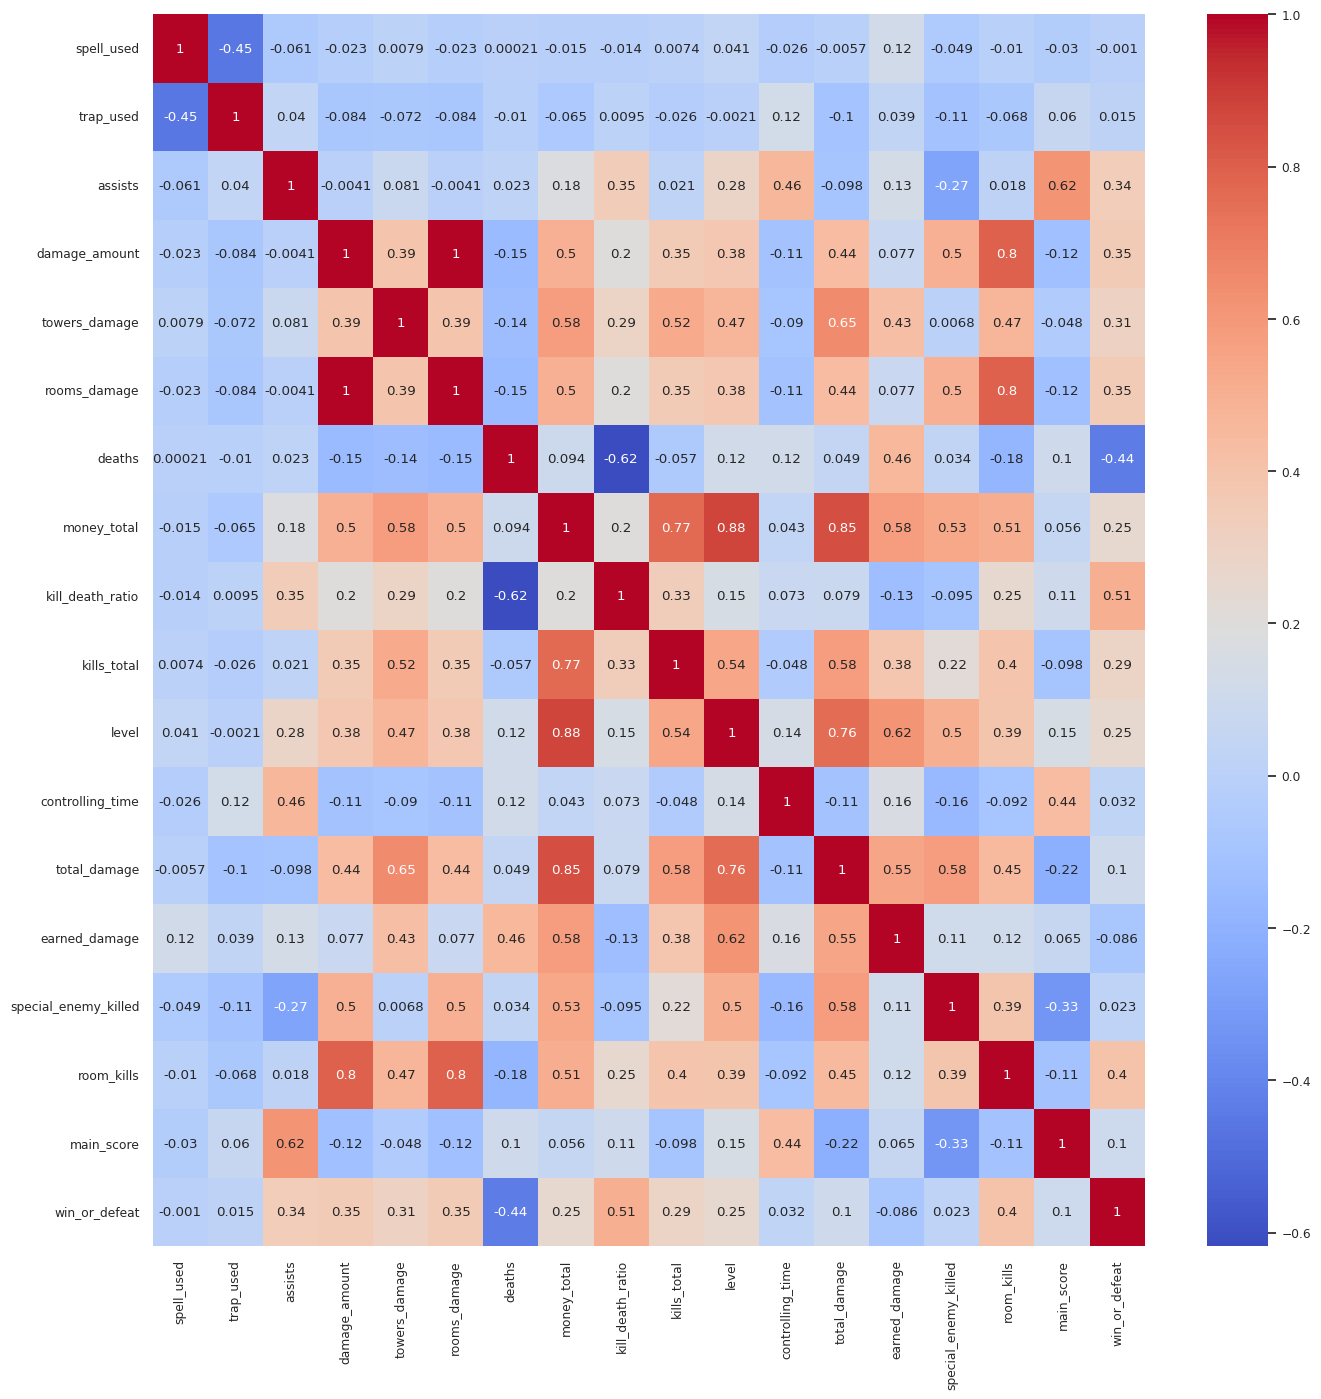

In [59]:
corr = df.corr()
plt.figure(figsize=(16,16))
sns.set(font_scale=0.8)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

3- Plot bar plot of combined `position` and `location` columns (hint: use crosstab in pandas) **(P2-3: 5 points)**

<Axes: xlabel='position'>

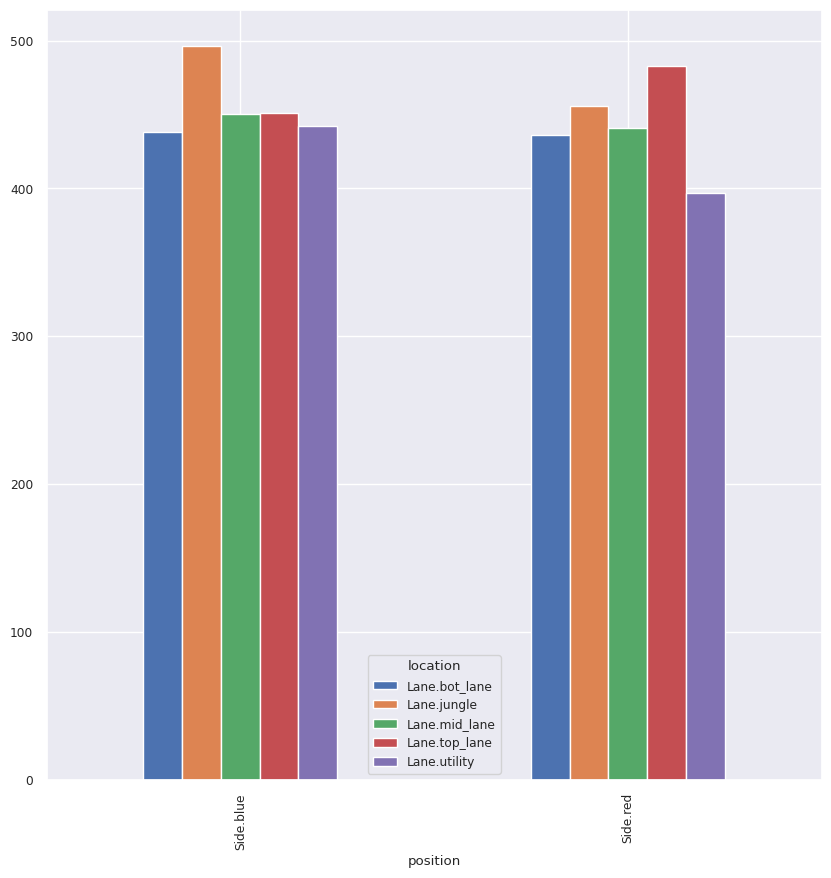

In [60]:
pd.crosstab(df['position'], df['location']).plot(kind='bar', figsize=(10,10))

4- Plot pie chart of `level` column **(P2-4: 5 points)**

<Axes: ylabel='level'>

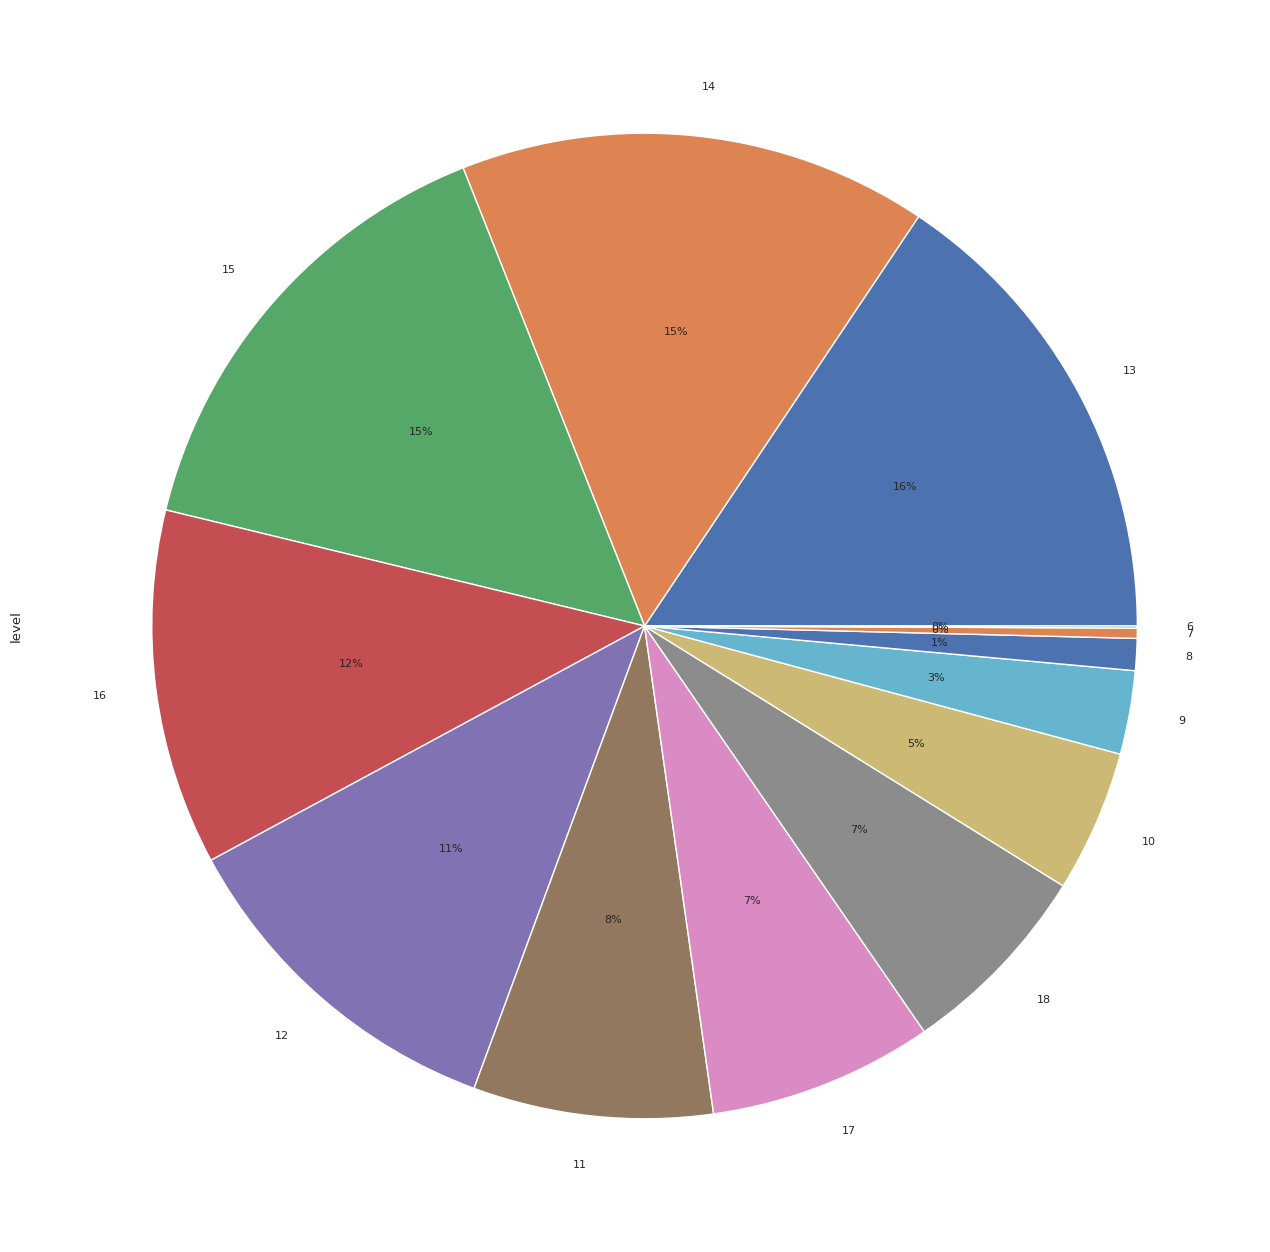

In [66]:
df['level'].value_counts().plot(kind='pie', autopct='%1.0f%%', figsize=(16,16), fontsize=8)

5- Plot box-plot on combination of `location` and `earned_damage` columns **(P2-5: 5 points)**

<Axes: title={'center': 'earned_damage'}, xlabel='location'>

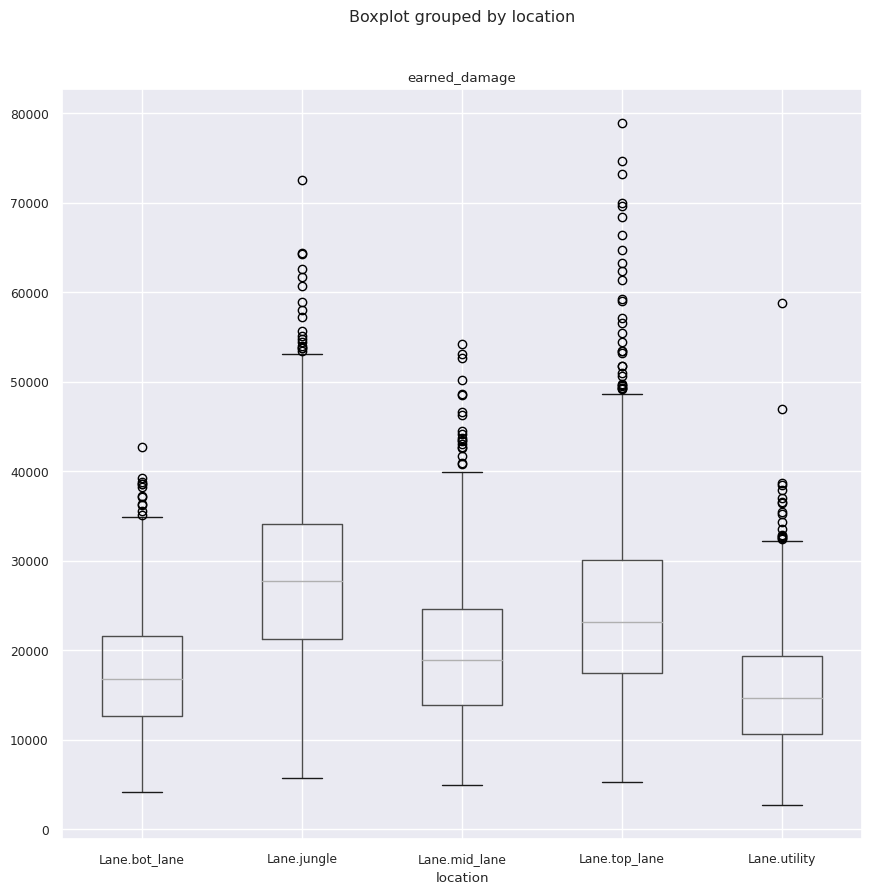

In [16]:
df.boxplot(column='earned_damage', by='location', figsize=(10,10))

6- Plot histplot of `spell_used` column (10 bins). **(P2-6: 5 points)**

<Axes: >

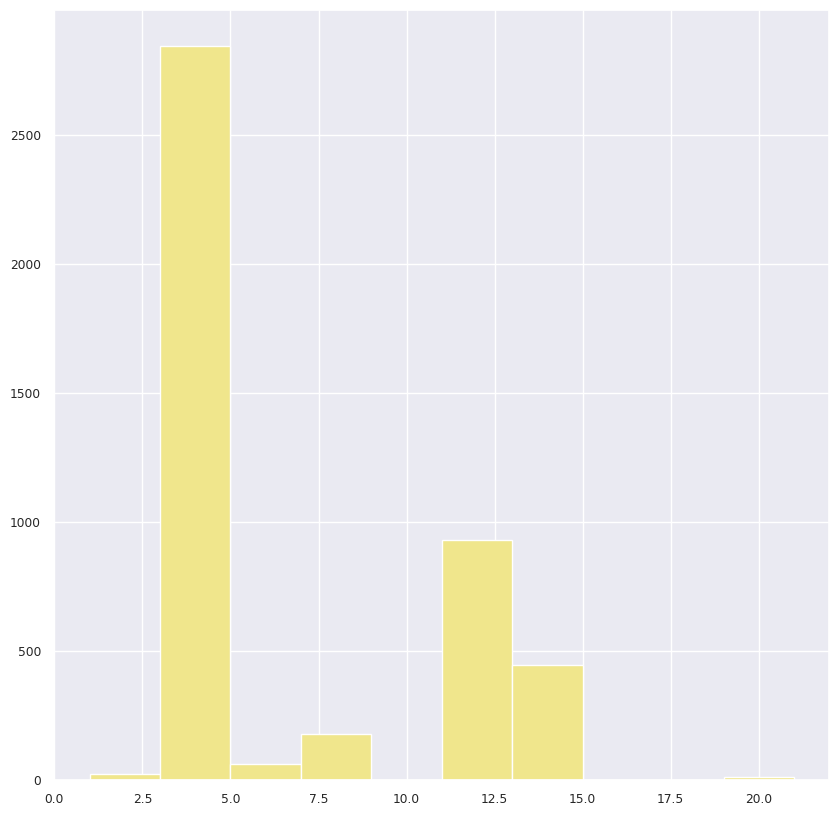

In [17]:
df['spell_used'].hist(figsize=(10,10), color="khaki")

# P3: Pre-processing (15 points)
In this section, we perform some pre-processing to make the data ready for model.

First of all, in your heatmap, there are some variables that have very low correlation with your dependent variable. You can delete those features that their absulote value of correlation with dependent variable is less than 0.015. **(P3-1: 5 points)**

In [18]:
corr = df.corr()
independants = corr["win_or_defeat"][abs(corr["win_or_defeat"])< 0.015]
print(independants)
df.drop(independants.index, axis=1, inplace=True)
df.head()

spell_used   -0.000998

trap_used     0.014610

Name: win_or_defeat, dtype: float64


<ipython-input-18-a05ca2b1eb4d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

  corr = df.corr()


,character,position,location,assists,damage_amount,towers_damage,rooms_damage,deaths,money_total,kill_death_ratio,kills_total,level,controlling_time,total_damage,earned_damage,special_enemy_killed,room_kills,main_score,win_or_defeat
0,TwistedFate,Side.blue,Lane.top_lane,9.0,1862,5119,1862,9,9152,1.222222,2,13,19,99079,25062,149,1,21,False
2,Ziggs,Side.blue,Lane.bot_lane,3.0,543,2754,543,4,9014,1.750000,4,12,11,106757,10049,168,0,11,False
3,Senna,Side.red,Lane.bot_lane,4.0,1547,1547,1547,6,8155,1.000000,2,12,14,53993,12480,129,1,11,False
5,Rengar,Side.red,Lane.jungle,7.0,1564,16053,1564,4,11536,3.500000,7,14,14,128646,40236,27,1,17,True
6,Ziggs,Side.blue,Lane.bot_lane,9.0,19665,20431,19665,3,10699,5.333333,7,12,11,123192,8057,140,4,9,True


Next step is to encode labels. Columns that are not numeric ('string' or 'object'), can't be given to the model, so you should convert them to numeric values <br> (hint: use sklearn LabelEncoder). **(P3-2: 5 points)**

In [19]:
print(df.select_dtypes(exclude=[np.number]).columns)

Index(['character', 'position', 'location', 'win_or_defeat'], dtype='object')


In [20]:
# as I will not use it later in this notebook, I use one labelencoder and fit transform each time. If I had test data to work on, I do seperately on each le1,le2, ...
le = preprocessing.LabelEncoder()
df['character'] = le.fit_transform(df['character'])
df['position'] = le.fit_transform(df['position'])
df['location'] = le.fit_transform(df['location'])
df['win_or_defeat'] = le.fit_transform(df['win_or_defeat'])
df.head()

,character,position,location,assists,damage_amount,towers_damage,rooms_damage,deaths,money_total,kill_death_ratio,kills_total,level,controlling_time,total_damage,earned_damage,special_enemy_killed,room_kills,main_score,win_or_defeat
0,129,0,3,9.0,1862,5119,1862,9,9152,1.222222,2,13,19,99079,25062,149,1,21,0
2,153,0,0,3.0,543,2754,543,4,9014,1.750000,4,12,11,106757,10049,168,0,11,0
3,105,1,0,4.0,1547,1547,1547,6,8155,1.000000,2,12,14,53993,12480,129,1,11,0
5,99,1,1,7.0,1564,16053,1564,4,11536,3.500000,7,14,14,128646,40236,27,1,17,1
6,153,0,0,9.0,19665,20431,19665,3,10699,5.333333,7,12,11,123192,8057,140,4,9,1


now we need to normalize columns of the dataframe which causes our model to converge better and prevent focusing on some specific number of columns. we use 'Z normalization' for this purpose.

be careful not to normalize 'win_or_defeat' column!

In [21]:
scaler = StandardScaler()
cols = df.columns.difference(['win_or_defeat'])
df[cols] = scaler.fit_transform(df[cols])
df.head()

,character,position,location,assists,damage_amount,towers_damage,rooms_damage,deaths,money_total,kill_death_ratio,kills_total,level,controlling_time,total_damage,earned_damage,special_enemy_killed,room_kills,main_score,win_or_defeat
0,1.135199,-0.985846,0.730953,0.142914,-0.245013,-0.424326,-0.245013,1.083718,-0.495275,-0.632072,-0.860115,-0.350422,0.005369,-0.266529,0.363237,0.335760,-0.026623,-0.437972,0
2,1.670781,-0.985846,-1.419754,-0.919180,-0.657121,-0.657824,-0.657121,-0.572700,-0.535008,-0.492870,-0.396193,-0.771566,-0.563516,-0.157483,-1.151221,0.562643,-0.787997,-0.917721,0
3,0.599617,1.014357,-1.419754,-0.742165,-0.343431,-0.776992,-0.343431,0.089867,-0.782331,-0.690683,-0.860115,-0.771566,-0.350184,-0.906860,-0.905990,0.096936,-0.026623,-0.917721,0
5,0.465722,1.014357,-0.702852,-0.211118,-0.338120,0.655197,-0.338120,-0.572700,0.191125,-0.031306,0.299689,0.070722,-0.350184,0.153394,1.893935,-1.121065,-0.026623,-0.629871,1
6,1.670781,-0.985846,-1.419754,0.142914,5.317346,1.087440,5.317346,-0.903984,-0.049864,0.452237,0.299689,-0.771566,-0.563516,0.075934,-1.352166,0.228289,2.257500,-1.013671,1


# P4: Regression Model (30 points)

Split the data to train, test, and validation using sklearn's `train_test_split`. Use 10% of the data for the testing phase, another 10% for the validation phase, and the remaining for the training phase.

In [22]:
X = df.drop(['win_or_defeat'], axis=1).values
y = df['win_or_defeat'].values
X_train, X_rest, y_train, y_rest = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_rest, y_rest, test_size=0.5, random_state=42)
print(X_train.shape, X_val.shape, X_test.shape)

(3592, 18) (449, 18) (449, 18)


### Custom Regression Model

1- Complete custom logistic regression functions below **(P4-1: 10 points)**

In [23]:
from sklearn.metrics import accuracy_score

class CustomLogisticRegression():
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.bias = None
        self.weights = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def loss(self, X, y):
        f = self.sigmoid(np.dot(X, self.weights) + self.bias)
        return -np.mea((y * np.log(f)) + ((1 - y) * np.log(1 - f)))

    def loss_backward(self, X, y):
        f = self.sigmoid(np.dot(X, self.weights) + self.bias)
        dw = np.dot(X.T, (f - y)) / y.shape[0]
        db = np.mean(f - y)
        return dw,db

    def fit(self, X, y):
        self.weights = np.zeros(X.shape[1])
        self.bias = 0

        for i in range(self.num_iterations):
            dw, db = self.loss_backward(X, y)
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        z = np.dot(X, self.weights) + self.bias
        return np.round(self.sigmoid(z))

### Torch Regression Model

2- Implement the Logistic Regression Model. This time, use Pytorch! **(P4-2: 10 points)**

In [24]:
import torch

class TorchLogisticRegression():

    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.model = None

    def loss(self, X, y):
        l = torch.nn.BCELoss()
        pred = self.model(X)
        return l(pred.squeeze(), y.squeeze())

    def predict(self, X):
        X = torch.from_numpy(X.astype(np.float32))
        return (self.model(X) > 0.5).float().squeeze().numpy()


    def fit(self, X_train, Y_train):
        X_train = torch.from_numpy(X_train.astype(np.float32))
        Y_train = torch.from_numpy(Y_train.astype(np.float32))
        self.model = torch.nn.Sequential(torch.nn.Linear(X_train.shape[1], 1), torch.nn.Sigmoid())
        optimizer = torch.optim.Adam(self.model.parameters(), lr=self.learning_rate)
        for i in range(self.num_iterations):
            optimizer.zero_grad()
            loss = self.loss(X_train, Y_train)
            loss.backward()
            optimizer.step()

### SK-Learn Regression Model

3- Now train a Logistic Regression using SK-Learn **(P4-3: 5 points)**

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
skmodel = LogisticRegression()
skmodel.fit(X_train, y_train)
skpred = skmodel.predict(X_val)
print("sklearn logistic regression accuracy: ", accuracy_score(y_val, skpred))

sklearn logistic regression accuracy:  0.8463251670378619


### Predicting the output for the testing data
4- Train Custom Logistic Regression and Torch Logistic Regression models and then Predict the `Outcome` for the testing samples using both models. **(P4-4: 5 points)**

In [26]:
model = CustomLogisticRegression()
model.fit(X_train, y_train)
pred = model.predict(X_val)
print("custom logistic regression accuracy: ", accuracy_score(y_val, pred))

custom logistic regression accuracy:  0.844097995545657


In [27]:
torch_model = TorchLogisticRegression()
torch_model.fit(X_train, y_train)
torch_pred = torch_model.predict(X_val)
print("torch logistic regression accuracy: ", accuracy_score(y_val, torch_pred))

torch logistic regression accuracy:  0.8463251670378619


# P5: Evaluation (10 points)

1- Complete the metric codes. then evaluate all the models results using the implemented metrices and compare them. **(P5-1: 10 points)**

In [28]:
class classification_full_report():

    def __init__(self, y_true, y_pred):
        self.y_true = y_true
        self.y_pred = y_pred

    def accuracy(self):
        return np.mean(self.y_true == self.y_pred)

    def f1_score(self):
        tp = np.sum((self.y_true == 1) & (self.y_pred == 1))
        fp = np.sum((self.y_true == 0) & (self.y_pred == 1))
        fn = np.sum((self.y_true == 1) & (self.y_pred == 0))
        return 2 * tp / (2 * tp + fp + fn)


    def precision(self):
        tp = np.sum((self.y_true == 1) & (self.y_pred == 1))
        fp = np.sum((self.y_true == 0) & (self.y_pred == 1))
        return tp / (tp + fp)

    def recall(self):
        tp = np.sum((self.y_true == 1) & (self.y_pred == 1))
        fn = np.sum((self.y_true == 1) & (self.y_pred == 0))
        return tp / (tp + fn)

    def confusion_matrix(self):
        tp = np.sum((self.y_true == 1) & (self.y_pred == 1))
        fp = np.sum((self.y_true == 0) & (self.y_pred == 1))
        fn = np.sum((self.y_true == 1) & (self.y_pred == 0))
        tn = np.sum((self.y_true == 0) & (self.y_pred == 0))
        return np.array([[tp, fp], [fn, tn]])

In [29]:
print("sklearn logistic regression classification report: ")
print(f"confusion matrix: {classification_full_report(y_val, skpred).confusion_matrix()}")
print(f"accuracy: {classification_full_report(y_val, skpred).accuracy()}")
print(f"f1: {classification_full_report(y_val, skpred).f1_score()}")
print(f"precition: {classification_full_report(y_val, skpred).precision()}")
print(f"recall: {classification_full_report(y_val, skpred).recall()}")
print("\n==========================================\n")
print("custom logistic regression classification report: ")
print(f"confusion matrix: {classification_full_report(y_val, pred).confusion_matrix()}")
print(f"accuracy: {classification_full_report(y_val, pred).accuracy()}")
print(f"f1: {classification_full_report(y_val, pred).f1_score()}")
print(f"precition: {classification_full_report(y_val, pred).precision()}")
print(f"recall: {classification_full_report(y_val, pred).recall()}")
print("\n==========================================\n")
print("torch logistic regression classification report: ")
print(f"confusion matrix: {classification_full_report(y_val, torch_pred).confusion_matrix()}")
print(f"accuracy: {classification_full_report(y_val, torch_pred).accuracy()}")
print(f"f1: {classification_full_report(y_val, torch_pred).f1_score()}")
print(f"precition: {classification_full_report(y_val, torch_pred).precision()}")
print(f"recall: {classification_full_report(y_val, torch_pred).recall()}")

sklearn logistic regression classification report: 

confusion matrix: [[184  35]

 [ 34 196]]

accuracy: 0.8463251670378619

f1: 0.8421052631578947

precition: 0.8401826484018264

recall: 0.8440366972477065






custom logistic regression classification report: 

confusion matrix: [[183  35]

 [ 35 196]]

accuracy: 0.844097995545657

f1: 0.8394495412844036

precition: 0.8394495412844036

recall: 0.8394495412844036






torch logistic regression classification report: 

confusion matrix: [[185  36]

 [ 33 195]]

accuracy: 0.8463251670378619

f1: 0.8428246013667426

precition: 0.8371040723981901

recall: 0.8486238532110092


# P6: Neural Net (5 points)

Implement a neural net containing the following layers: LSTM, CNN, Pooling and Dense (Linear). Train the neural network on the training data and tune its hyperparameters using the validation data. Finally, print a classification report indicating how well its doing on the testing data. **(P6-1: 5 points)**

In [30]:
X = df.drop(['win_or_defeat'], axis=1).values
y = df['win_or_defeat'].values
X_train, X_rest, y_train, y_rest = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_rest, y_rest, test_size=0.5, random_state=42)
print(X_train.shape, X_val.shape, X_test.shape)

(3592, 18) (449, 18) (449, 18)


In [47]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

class ConvLSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, kernel_size, pool_size, output_size):
        super(ConvLSTMModel, self).__init__()
        self.conv1d = nn.Conv1d(in_channels=18, out_channels=32, kernel_size=kernel_size, padding='same')
        self.relu = nn.ReLU()
        self.maxpool1d = nn.AvgPool1d(kernel_size=pool_size)
        self.lstm = nn.LSTM(input_size=32, hidden_size=hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = x.reshape(x.shape[0],x.shape[1],1)
        x = self.conv1d(x)
        x = self.relu(x)
        x = x.permute(0,2,1)
        x = self.maxpool1d(x)
        x = x.permute(0, 2, 1)
        x, _ = self.lstm(x)
        x = x[:, -1, :]
        x = self.fc(x)
        x = self.sigmoid(x)

        return x


X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val, dtype = torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype = torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

bs =32
train_loader = DataLoader(train_dataset, batch_size=bs, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=bs, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=bs, shuffle=False)
input_size = X_train.shape[1]
hidden_size = 64
kernel_size = 10
pool_size = 2
output_size = 1
model = ConvLSTMModel(input_size, hidden_size, kernel_size, pool_size, output_size)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

num_epochs = 40
for epoch in range(num_epochs):
    model.train()
    total_loss = 0.0

    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels.unsqueeze(1))
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    average_loss = total_loss / len(train_loader)
    print(f'Epoch {epoch + 1}/{num_epochs}, Loss: {average_loss:.4f}')


def calculate_accuracy(predictions, targets):
    binary_predictions = (predictions >= 0.5).float().flatten()
    correct = (binary_predictions == targets).float().sum()
    accuracy = correct / targets.size(0)
    return accuracy.item()

model.eval()
with torch.no_grad():
    val_outputs = torch.cat([model(inputs) for inputs, _ in val_loader])
    val_labels = torch.cat([labels for _, labels in val_loader])
    val_accuracy = calculate_accuracy(val_outputs, val_labels)
    val_loss = criterion(val_outputs, val_labels.unsqueeze(1))
    print(f'Validation accuracy: {val_accuracy:.4f}')


Epoch 1/40, Loss: 0.5115

Epoch 2/40, Loss: 0.3645

Epoch 3/40, Loss: 0.3529

Epoch 4/40, Loss: 0.3477

Epoch 5/40, Loss: 0.3411

Epoch 6/40, Loss: 0.3409

Epoch 7/40, Loss: 0.3440

Epoch 8/40, Loss: 0.3377

Epoch 9/40, Loss: 0.3326

Epoch 10/40, Loss: 0.3280

Epoch 11/40, Loss: 0.3252

Epoch 12/40, Loss: 0.3233

Epoch 13/40, Loss: 0.3284

Epoch 14/40, Loss: 0.3210

Epoch 15/40, Loss: 0.3176

Epoch 16/40, Loss: 0.3174

Epoch 17/40, Loss: 0.3142

Epoch 18/40, Loss: 0.3135

Epoch 19/40, Loss: 0.3201

Epoch 20/40, Loss: 0.3086

Epoch 21/40, Loss: 0.3050

Epoch 22/40, Loss: 0.3038

Epoch 23/40, Loss: 0.3001

Epoch 24/40, Loss: 0.2998

Epoch 25/40, Loss: 0.2977

Epoch 26/40, Loss: 0.2976

Epoch 27/40, Loss: 0.2913

Epoch 28/40, Loss: 0.2920

Epoch 29/40, Loss: 0.2933

Epoch 30/40, Loss: 0.2860

Epoch 31/40, Loss: 0.2855

Epoch 32/40, Loss: 0.2848

Epoch 33/40, Loss: 0.2858

Epoch 34/40, Loss: 0.2747

Epoch 35/40, Loss: 0.2778

Epoch 36/40, Loss: 0.2771

Epoch 37/40, Loss: 0.2729

Epoch 38/4

I used the validation above on several lr and kernel sizes, lr between 0.003 to 0.3 this was doing well so I chosed it, afterwards I changed the sizes but the change wasnt noticeable on the improvement side os I kept with my primary choice...

In [49]:
# some classification report on test data I did
model.eval()
with torch.no_grad():
    test_outputs = torch.cat([model(inputs) for inputs, _ in test_loader])
    test_labels = torch.cat([labels for _, labels in test_loader])
    outputs = test_outputs.squeeze().numpy()>0.5
    outputs = np.array([float(i) for i in outputs])
    labels = test_labels.numpy()
    print(f"confusion matrix: {classification_full_report(labels, outputs).confusion_matrix()}")
    print(f"accuracy: {classification_full_report(labels, outputs).accuracy()}")
    print(f"f1: {classification_full_report(labels, outputs).f1_score()}")
    print(f"precition: {classification_full_report(labels, outputs).precision()}")
    print(f"recall: {classification_full_report(labels, outputs).recall()}")

confusion matrix: [[182  25]

 [ 43 199]]

accuracy: 0.8485523385300668

f1: 0.8425925925925926

precition: 0.8792270531400966

recall: 0.8088888888888889


In the above classification report, I used my own class from before 'cuz I'm an idiot. Feel free to use the functions made for this instead. :)